# Machine model exploration

**References:**
- <https://machinelearningmastery.com/feature-selection-with-real-and-categorical-data/>

---

**Aim:**  
In this notebook we will explore how different types of responses and predictors being selected can affect the accuracy, MSE, and other statistical indicators.

In [1]:
## imports
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
from IPython.display import Image, display_svg, SVG
sb.set() # set the default Seaborn style for graphics

# Import the required function from sklearn
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor,DecisionTreeClassifier,plot_tree
from sklearn.linear_model import LinearRegression
from sklearn import tree as sktree
from sklearn import svm, datasets
from sklearn import metrics
from sklearn.metrics import confusion_matrix, mean_squared_error,accuracy_score,mean_absolute_error
from sklearn.utils.multiclass import unique_labels
from sklearn.metrics import precision_recall_fscore_support

In [2]:
import zipfile
# Here we use the python package to open the zip file such that there is no need to unzip it
with zipfile.ZipFile("craigslist-carstrucks-data/vehicles.zip") as z:
   with z.open("carData_clean.csv") as f:
      carData_clean = pd.read_csv(f)
        
carData_clean.head()

,price,year,manufacturer,condition,odometer,state,fuel_diesel,fuel_electric,fuel_gas,fuel_hybrid,...,title_status_parts only,title_status_rebuilt,title_status_salvage,transmission_automatic,transmission_manual,transmission_other,drive_NOTKNOWN,drive_fwd,drive_rwd,PRICECATEGORY
0,10.421984,2014.0,14,3,10.966870,1,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,9
1,10.025263,2010.0,7,3,11.173656,1,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,7
2,10.586332,2020.0,7,3,9.860580,1,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,10
3,10.341420,2017.0,39,3,10.624348,1,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,9
4,9.615805,2013.0,13,1,11.759786,1,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,5


# Exploratory question
**Main problem:** How different variables such as [odometer, year, condition, fuel, title_status, transmission, drive, state, brand] affect the resale price of a car.

**Subproblem 1**: How do different models (Tree regressor, linear regression, tree classifier) repond to the variables.  

**Subproblem 2**: Does applying feature engineering to the dataset change the way the model responds (Tree regressor, linear regression, tree classifier) to the dataest.  

**Subproblem 3**: Is there a better model (XGBoost) we can use to better predict the price of the car.  

## Recap

**Main problem:** How different variables such as [odometer, year, condition, fuel, title_status, transmission, drive, state, manufacturer] affect the resale price of a car

**Subproblem 1: How do different models (Tree regressor, linear regression, tree classifier) repond to the variables**

In [3]:
train_tree, test_tree = train_test_split(carData_clean, test_size = 0.2, random_state=0)

Number of features 	:  21
Number of leaf nodes 	:  933



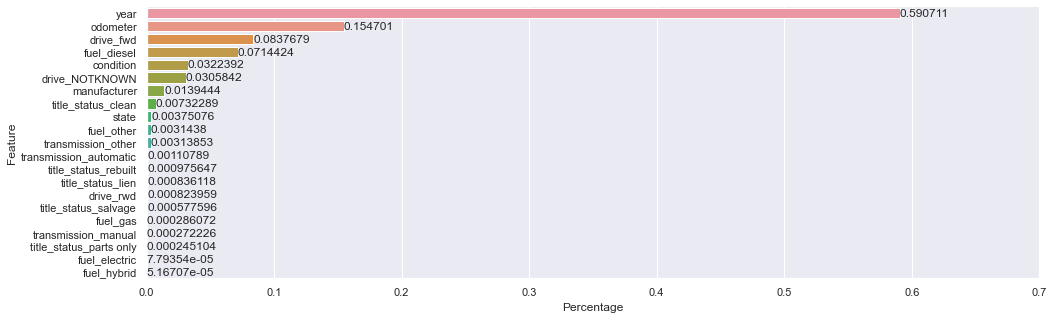

In [4]:
# ---- tree regressor model ----

# Since we are using a tree regressor, we want to choose a model that minmises
# MSE score. This is precisely what this model does
tree = DecisionTreeRegressor(max_depth = 10, random_state=0)
tree.fit(train_tree.drop(columns=['price','PRICECATEGORY']),train_tree[['price']])

print('Number of features \t: ', tree.n_features_in_)
print('Number of leaf nodes \t: ', tree.get_n_leaves())
print()

# ---- Feature importance ----
# Extract the weightage of importance for each data
feature = pd.DataFrame({'Feature' :train_tree.drop(columns=['price','PRICECATEGORY']).columns,\
                    'Percentage' : tree.feature_importances_ })
feature = feature.sort_values('Percentage',ascending=False).reset_index(drop = True)

# Plot the barchart of the features for visualisation
plt.figure(figsize=(16,5))
ax = sb.barplot(x = feature.Percentage, y = feature.Feature,\
                label = 'Total', edgecolor = 'w')
ax.set_xlim(0,0.7)
for container in ax.containers:
    ax.bar_label(container)

In [5]:
results=pd.DataFrame(tree.predict(train_tree.drop(columns=['price','PRICECATEGORY'])),columns=['predict'])
results['actual']=list(train_tree['price'])
results2=pd.DataFrame(tree.predict(test_tree.drop(columns=['price','PRICECATEGORY'])),columns=['predict'])
results2['actual']=list(test_tree['price'])

print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", metrics.r2_score(results['actual'], results['predict']))
print("Mean Absolute Error (MAE) \t:",  metrics.mean_absolute_error(results['actual'], results['predict']))
print("Mean Squared Error (MSE) \t:",  metrics.mean_squared_error(results['actual'], results['predict']))
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(metrics.mean_squared_error(results['actual'], results['predict'])))
print()
# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", metrics.r2_score(results2['actual'], results2['predict']))
print("Mean Absolute Error (MAE) \t:",  metrics.mean_absolute_error(results2['actual'], results2['predict']))
print("Mean Squared Error (MSE) \t:",  metrics.mean_squared_error(results2['actual'], results2['predict']))
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(metrics.mean_squared_error(results2['actual'], results2['predict'])))


Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.7070686314098662
Mean Absolute Error (MAE) 	: 0.32126410697022406
Mean Squared Error (MSE) 	: 0.21432201780294166
Root Mean Squared Error (RMSE) 	: 0.46294926050588053

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.6959882798406747
Mean Absolute Error (MAE) 	: 0.325920970272204
Mean Squared Error (MSE) 	: 0.22312420401348104
Root Mean Squared Error (RMSE) 	: 0.47236024813004857


Intercept of Regression 	: b =  [-41.17794548]
Coefficients of Regression 	: a =  [[ 2.81698919e-02 -1.83102646e-03 -6.34598754e-02 -4.89602067e-01
  -8.96687574e-04  6.03008586e-01 -1.46459522e-01 -1.53282746e-01
  -8.81436382e-02  5.56476645e-02  1.75493754e-01  2.82999586e-01
  -1.12799683e+00 -1.15856933e-01 -3.01869697e-01 -1.51957193e-01
  -1.09880356e-01  3.47395742e-03 -3.39925397e-01 -5.78553586e-01
  -7.85574187e-02]]



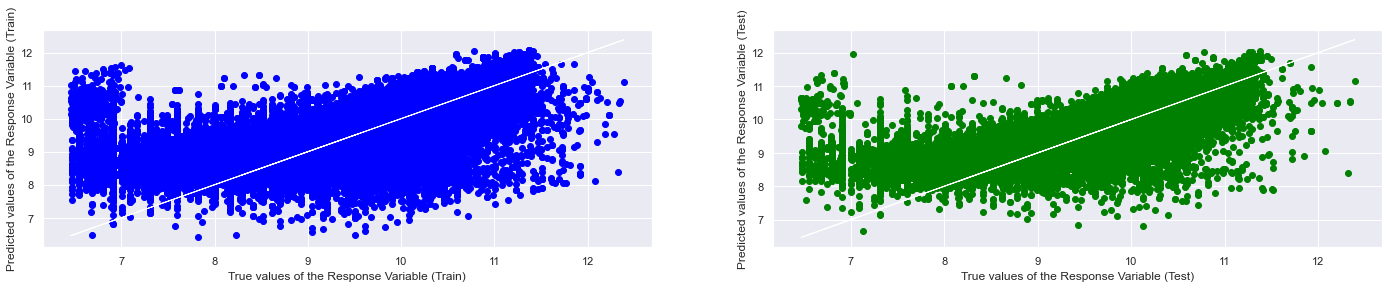

In [6]:
# ---- Linear Model ----

linreg = LinearRegression()
linreg.fit(train_tree.drop(columns=['price','PRICECATEGORY']),train_tree[['price']])
# Coefficients of the Linear Regression line
print('Intercept of Regression \t: b = ', linreg.intercept_)
print('Coefficients of Regression \t: a = ', linreg.coef_)
print()
# Predict Total values corresponding to HP
y_train_pred = linreg.predict(train_tree.drop(columns=['price','PRICECATEGORY']))
y_test_pred = linreg.predict(test_tree.drop(columns=['price','PRICECATEGORY']))

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 4))
axes[0].scatter(train_tree['price'], y_train_pred, color = "blue")
axes[0].plot(train_tree['price'], train_tree['price'], 'w-', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")

axes[1].scatter(test_tree['price'], y_test_pred, color = "green")
axes[1].plot(test_tree['price'], test_tree['price'], 'w-', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

Score: 0.03	| Feature: year
Score: -0.00	| Feature: manufacturer
Score: -0.06	| Feature: condition
Score: -0.49	| Feature: odometer
Score: -0.00	| Feature: state
Score: 0.60	| Feature: fuel_diesel
Score: -0.15	| Feature: fuel_electric
Score: -0.15	| Feature: fuel_gas
Score: -0.09	| Feature: fuel_hybrid
Score: 0.06	| Feature: fuel_other
Score: 0.18	| Feature: title_status_clean
Score: 0.28	| Feature: title_status_lien
Score: -1.13	| Feature: title_status_parts only
Score: -0.12	| Feature: title_status_rebuilt
Score: -0.30	| Feature: title_status_salvage
Score: -0.15	| Feature: transmission_automatic
Score: -0.11	| Feature: transmission_manual
Score: 0.00	| Feature: transmission_other
Score: -0.34	| Feature: drive_NOTKNOWN
Score: -0.58	| Feature: drive_fwd
Score: -0.08	| Feature: drive_rwd


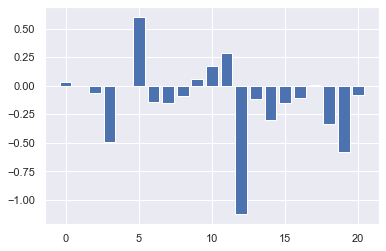

In [7]:
importance = linreg.coef_[0]
for i,v in enumerate(importance):
    print('Score: {:.2f}\t| Feature: {}'.format(v,linreg.feature_names_in_[i]))
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [8]:
# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(train_tree.drop(columns=['price','PRICECATEGORY']), train_tree['price']))
print("Mean Squared Error (MSE) \t:", mean_squared_error(train_tree[['price']], y_train_pred))
print()
# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(test_tree.drop(columns=['price','PRICECATEGORY']), test_tree['price']))
print("Mean Squared Error (MSE) \t:", mean_squared_error(test_tree[['price']], y_test_pred))
print()

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.5655048635143822
Mean Squared Error (MSE) 	: 0.3178965599531171

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.5663851861699369
Mean Squared Error (MSE) 	: 0.3182441786572644



## Recap

**Main problem:** How different variables such as [odometer, year, condition, fuel, title_status, transmission, drive, state, manufacturer] affect the resale price of a car

**Subproblem 2: Does applying feature engineering to the dataset change the way the model responds (Tree regressor, linear regression, tree classifier) to the dataest**

## Feature Engineering
We applied **discretization** on price to group it to larger bins, making it a categorical type data. Here we take a look at the impact of the feature engineering and check if we get a better R^2 value.

We will see that there is a better R^2 on the model -> better fit on model.

Number of features 	:  21
Number of leaf nodes 	:  10421



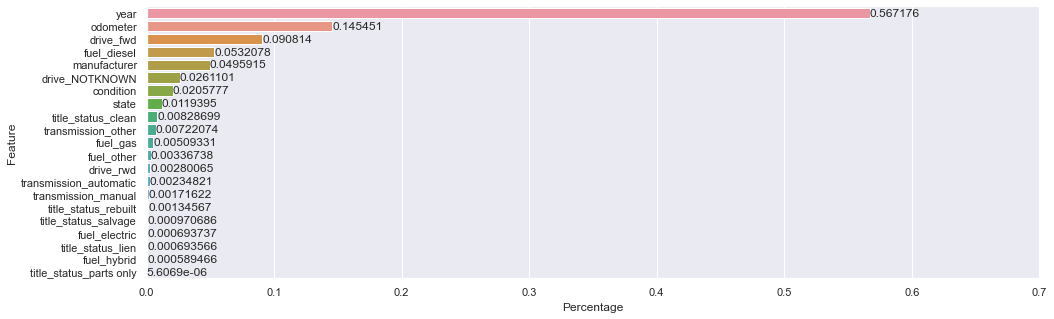

In [9]:
# ---- Feature manipulation ----
# We want to test if making price a categorical type variable would change the fit of the model
# when we train the model

# ---- tree regressor model ----

tree = DecisionTreeRegressor(max_depth=15, random_state=0)
tree.fit(train_tree.drop(columns=['price','PRICECATEGORY']),train_tree[['PRICECATEGORY']])

print('Number of features \t: ', tree.n_features_in_)
print('Number of leaf nodes \t: ', tree.get_n_leaves())
print()

# ---- Feature importance ----
# Extract the weightage of importance for each data
feature = pd.DataFrame({'Feature' :train_tree.drop(columns=['price','PRICECATEGORY']).columns,\
                    'Percentage' : tree.feature_importances_ })
feature = feature.sort_values('Percentage',ascending=False).reset_index(drop = True)

# Plot the barchart of the features for visualisation
plt.figure(figsize=(16,5))
ax = sb.barplot(x = feature.Percentage, y = feature.Feature,\
                label = 'Total', edgecolor = 'w')
ax.set_xlim(0,0.7)
for container in ax.containers:
    ax.bar_label(container)

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.832386223538786
Mean Absolute Error (MAE) 	: 0.801903349635573
Mean Squared Error (MSE) 	: 1.3861189532675628
Root Mean Squared Error (RMSE) 	: 1.1773355313025946

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.7825761187783347
Mean Absolute Error (MAE) 	: 0.9142554593632969
Mean Squared Error (MSE) 	: 1.7999305400665842
Root Mean Squared Error (RMSE) 	: 1.3416149000613344


Text(0, 0.5, 'Predicted')

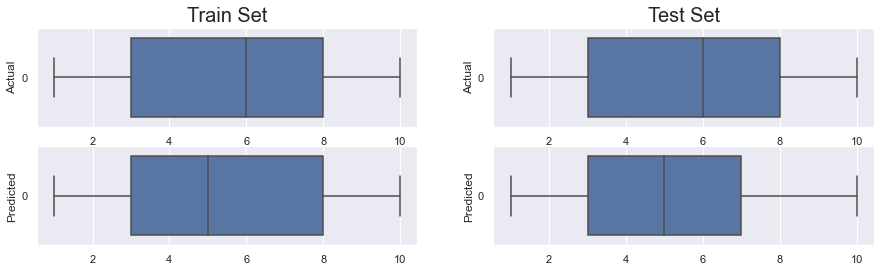

In [10]:
results=pd.DataFrame(tree.predict(train_tree.drop(columns=['price','PRICECATEGORY'])),columns=['predict'])
results['actual']=list(train_tree['PRICECATEGORY'])
results2=pd.DataFrame(tree.predict(test_tree.drop(columns=['price','PRICECATEGORY'])),columns=['predict'])
results2['actual']=list(test_tree['PRICECATEGORY'])

print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", metrics.r2_score(results['actual'], results['predict']))
print("Mean Absolute Error (MAE) \t:",  mean_absolute_error(results['actual'], results['predict']))
print("Mean Squared Error (MSE) \t:",  mean_squared_error(results['actual'], results['predict']))
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(metrics.mean_squared_error(results['actual'], results['predict'])))
print()
# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", metrics.r2_score(results2['actual'], results2['predict']))
print("Mean Absolute Error (MAE) \t:",  mean_absolute_error(results2['actual'], results2['predict']))
print("Mean Squared Error (MSE) \t:",  mean_squared_error(results2['actual'], results2['predict']))
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(metrics.mean_squared_error(results2['actual'], results2['predict'])))


f, axes = plt.subplots(2,2, figsize=(15, 4))
axes[0][0].set_title('Train Set', fontsize=20)
sb.boxplot(data=results['actual'].astype(int),orient="h",ax=axes[0][0])
axes[0][0].set_ylabel('Actual')
sb.boxplot(data=results['predict'].astype(int),orient="h",ax=axes[1][0])
axes[1][0].set_ylabel('Predicted')

axes[0][1].set_title('Test Set', fontsize=20)
sb.boxplot(data=results2['actual'].astype(int),orient="h",ax=axes[0][1])
axes[0][1].set_ylabel('Actual')
sb.boxplot(data=results2['predict'].astype(int),orient="h",ax=axes[1][1])
axes[1][1].set_ylabel('Predicted')

Intercept of Regression 	: b =  [-156.14759151]
Coefficients of Regression 	: a =  [[ 0.09072974 -0.00612771 -0.17830847 -1.72986166 -0.00214903  2.14267995
  -0.40581494 -0.47384058 -0.35257959  0.21412629  0.55865431  0.8536002
  -1.51280802 -0.58882404 -0.97917544 -0.46762315 -0.31106522  0.23479039
  -1.13994806 -2.12859687 -0.32673851]]



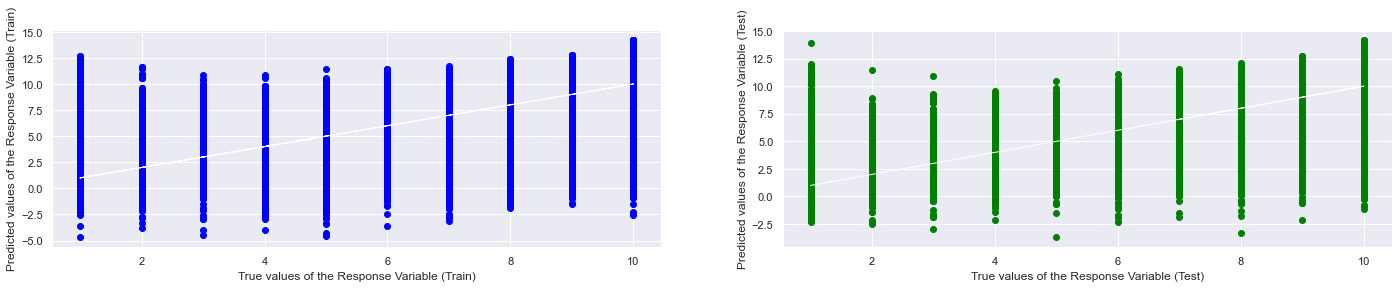

In [11]:
# ---- Linear model ----

linreg = LinearRegression()
linreg.fit(train_tree.drop(columns=['price','PRICECATEGORY']),train_tree[['PRICECATEGORY']])
# Coefficients of the Linear Regression line
print('Intercept of Regression \t: b = ', linreg.intercept_)
print('Coefficients of Regression \t: a = ', linreg.coef_)
print()
# Predict Total values corresponding to HP
y_train_pred = linreg.predict(train_tree.drop(columns=['price','PRICECATEGORY']))
y_test_pred = linreg.predict(test_tree.drop(columns=['price','PRICECATEGORY']))

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 4))
axes[0].scatter(train_tree['PRICECATEGORY'], y_train_pred, color = "blue")
axes[0].plot(train_tree['PRICECATEGORY'], train_tree['PRICECATEGORY'], 'w-', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")

axes[1].scatter(test_tree['PRICECATEGORY'], y_test_pred, color = "green")
axes[1].plot(test_tree['PRICECATEGORY'], test_tree['PRICECATEGORY'], 'w-', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

## Observations
Linear regression had negative predictions, which could imply that another solution is needed. We should note  not to use linear regression (simple or multiple) since they do not solve the problem we have.

In [12]:
# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(train_tree.drop(columns=['price','PRICECATEGORY']), train_tree[['PRICECATEGORY']]))
print("Mean Squared Error (MSE) \t:", mean_squared_error(train_tree[['PRICECATEGORY']], y_train_pred))
print()
# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(test_tree.drop(columns=['price','PRICECATEGORY']), test_tree[['PRICECATEGORY']]))
print("Mean Squared Error (MSE) \t:", mean_squared_error(test_tree[['PRICECATEGORY']], y_test_pred))
print()

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.614182207570753
Mean Squared Error (MSE) 	: 3.1906050080422874

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.6155606496948021
Mean Squared Error (MSE) 	: 3.1825580682750245



Score: 0.09	| Feature: year
Score: -0.01	| Feature: manufacturer
Score: -0.18	| Feature: condition
Score: -1.73	| Feature: odometer
Score: -0.00	| Feature: state
Score: 2.14	| Feature: fuel_diesel
Score: -0.41	| Feature: fuel_electric
Score: -0.47	| Feature: fuel_gas
Score: -0.35	| Feature: fuel_hybrid
Score: 0.21	| Feature: fuel_other
Score: 0.56	| Feature: title_status_clean
Score: 0.85	| Feature: title_status_lien
Score: -1.51	| Feature: title_status_parts only
Score: -0.59	| Feature: title_status_rebuilt
Score: -0.98	| Feature: title_status_salvage
Score: -0.47	| Feature: transmission_automatic
Score: -0.31	| Feature: transmission_manual
Score: 0.23	| Feature: transmission_other
Score: -1.14	| Feature: drive_NOTKNOWN
Score: -2.13	| Feature: drive_fwd
Score: -0.33	| Feature: drive_rwd


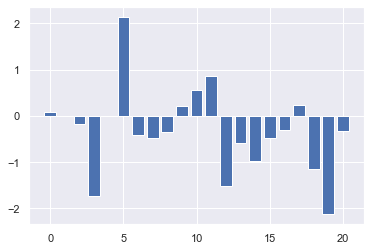

In [13]:
importance = linreg.coef_[0]
for i,v in enumerate(importance):
    print('Score: {:.2f}\t| Feature: {}'.format(v,linreg.feature_names_in_[i]))
plt.bar([x for x in range(len(importance))], importance)
plt.show()

## Classification model
We have seen the results from a regressor model, but since we applied **discretization** on the model, we want to also find out if we can take a categorical approach to predict the price category of the car based on the variables given.

Number of features 	:  21
Number of leaf nodes 	:  41114



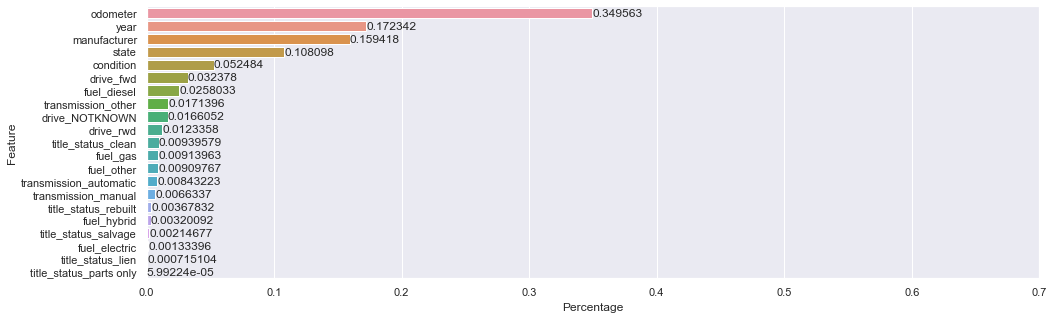

In [14]:
# ---- Decision Classifier tree ----

# Developing a model
treeClassifier = DecisionTreeClassifier(criterion="gini", random_state=0,max_depth=20)
treeClassifier.fit(train_tree.drop(columns=['price','PRICECATEGORY']),train_tree[['PRICECATEGORY']])

print('Number of features \t: ', treeClassifier.n_features_in_)
print('Number of leaf nodes \t: ', treeClassifier.get_n_leaves())
print()

# ---- Feature importance ----
# Extract the weightage of importance for each data
feature = pd.DataFrame({'Feature' :train_tree.drop(columns=['price','PRICECATEGORY']).columns,\
                    'Percentage' : treeClassifier.feature_importances_ })
feature = feature.sort_values('Percentage',ascending=False).reset_index(drop = True)

# Plot the barchart of the features for visualisation
plt.figure(figsize=(16,5))
ax = sb.barplot(x = feature.Percentage, y = feature.Feature,\
                label = 'Total', edgecolor = 'w')
ax.set_xlim(0,0.7)
for container in ax.containers:
    ax.bar_label(container)

F1-score takes both precision and recall into account, factoring for both FPs and FNs. We will use the metrics for classification model to visualise the goodness of fit for the model.

In [15]:
# Setting up dataframe to evaluate
results=pd.DataFrame(treeClassifier.predict(train_tree.drop(columns=['price','PRICECATEGORY'])),columns=['predict'])
results['actual']=list(train_tree['PRICECATEGORY'])
results2=pd.DataFrame(treeClassifier.predict(test_tree.drop(columns=['price','PRICECATEGORY'])),columns=['predict'])
results2['actual']=list(test_tree['PRICECATEGORY'])

print("_______________Overall Fit of the model for dataset_______________")
goFString ="Goodness of Fit of Model       " 
fscoreString = "F1 Score (%)                   "
precisionString  ="Precision Score (%)            "
recallString = "Recall Score (%)               "
accString = "Mean model accuracy (%)        "
r2 = "Explained Variance (R^2)       "

from sklearn.metrics import precision_recall_fscore_support

# Score array = {Precision, Recall, F1-Score, Support}
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_recall_fscore_support.html
score = precision_recall_fscore_support(results['actual'], results['predict'], average='weighted')
goFString += "| Dataset {} \t".format("Train")
fscoreString += "| {:^2.9f} \t".format(score[2]* 100.0)
precisionString += "| {:^2.9f} \t".format(score[0]* 100.0)
recallString += "| {:^2.9f} \t".format(score[1]* 100.0)
accString += "| {:^2.8f} \t".format(accuracy_score(results['actual'].astype(int), results['predict'].astype(int))* 100.0)
r2 += "| {:^2.9f} \t".format(metrics.r2_score(results['actual'], results['predict']))

score = precision_recall_fscore_support(results2['actual'], results2['predict'], average='weighted')
goFString += "| Dataset {} \t".format("Test")
fscoreString += "| {:^2.9f} \t".format(score[2]* 100.0)
precisionString += "| {:^2.9f} \t".format(score[0]* 100.0)
recallString += "| {:^2.9f} \t".format(score[1]* 100.0)
accString += "| {:^2.8f} \t".format(accuracy_score(results2['actual'].astype(int), results2['predict'].astype(int))* 100.0)
r2 += "| {:^2.9f} \t".format(metrics.r2_score(results2['actual'], results2['predict']))

# ---- Printing the concatenated metric strings for overall ----
print(goFString)
print(precisionString)
print(recallString)
print(fscoreString)
print(accString)
print(r2)

_______________Overall Fit of the model for dataset_______________
Goodness of Fit of Model       | Dataset Train 	| Dataset Test 	
Precision Score (%)            | 76.194403481 	| 58.541015143 	
Recall Score (%)               | 76.192655466 	| 58.531527537 	
F1 Score (%)                   | 76.168371565 	| 58.519332133 	
Mean model accuracy (%)        | 76.19265547 	| 58.53152754 	
Explained Variance (R^2)       | 0.855896726 	| 0.746476377 	


Text(0, 0.5, 'Predicted')

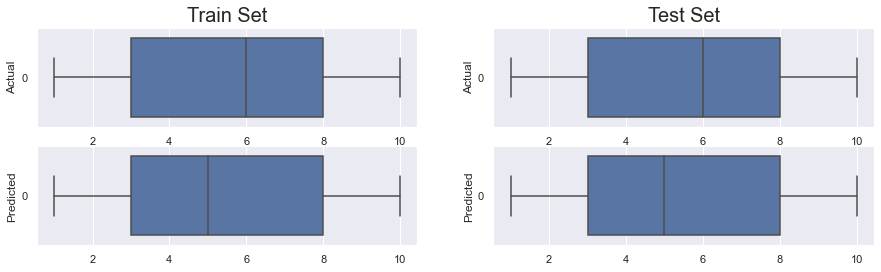

In [16]:
f, axes = plt.subplots(2,2, figsize=(15, 4))
axes[0][0].set_title('Train Set', fontsize=20)
sb.boxplot(data=results['actual'].astype(int),orient="h",ax=axes[0][0])
axes[0][0].set_ylabel('Actual')
sb.boxplot(data=results['predict'].astype(int),orient="h",ax=axes[1][0])
axes[1][0].set_ylabel('Predicted')

axes[0][1].set_title('Test Set', fontsize=20)
sb.boxplot(data=results2['actual'].astype(int),orient="h",ax=axes[0][1])
axes[0][1].set_ylabel('Actual')
sb.boxplot(data=results2['predict'].astype(int),orient="h",ax=axes[1][1])
axes[1][1].set_ylabel('Predicted')

C:\Users\ngtze\AppData\Local\Temp\ipykernel_16528\1391740647.py:19: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  ax.figure.colorbar(im, ax=ax)
C:\Users\ngtze\AppData\Local\Temp\ipykernel_16528\1391740647.py:19: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  ax.figure.colorbar(im, ax=ax)


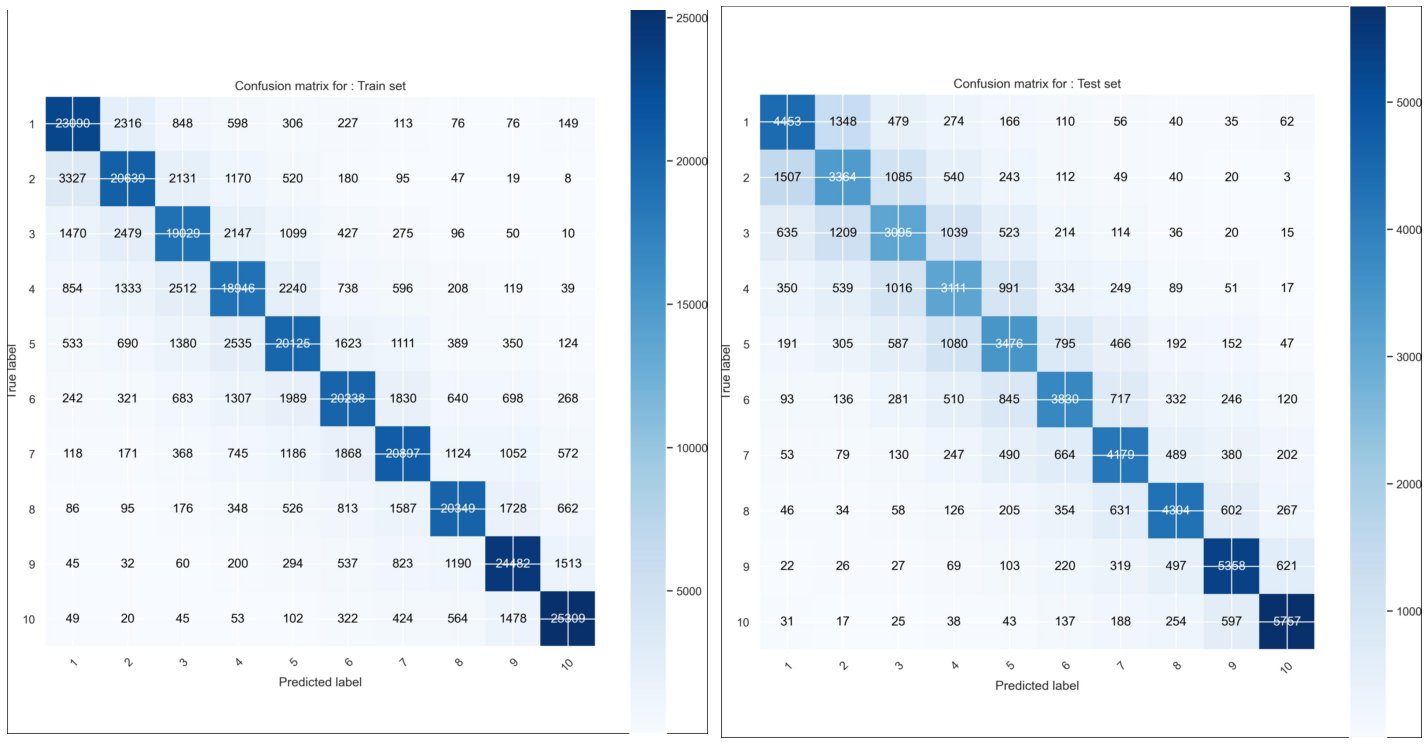

In [17]:
# Helper function for plotting confusion matrix
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    """
    if not title:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]

    fig, ax = plt.subplots(figsize=(10, 10))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    
    return fig

np.set_printoptions(precision=2)
class_names = np.array(['0','1', '2', '3', '4', '5','6','7','8','9','10'])
foldername = "DTreeConfusionMatrix"
resultsName = ["Train", "Test"]
resultsList = [results,results2]

#Make a dir if not found
if not os.path.exists(foldername):
    os.mkdir(foldername)
for name, result in zip(resultsName,resultsList):
    fig = plot_confusion_matrix(result['actual'], result['predict'], classes=class_names,
                        title='Confusion matrix for : '+ name + " set")
    fig.patch.set_linewidth(1)
    fig.patch.set_edgecolor('black')
    plt.savefig('{}/{}.jpg'.format(foldername, name), bbox_inches='tight', pad_inches = 0, dpi=320)
    plt.close()  # prevents figure from being displayed when code cell is executed

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 30))

# Display all saved confusion matrix in subplots
i = 0
for ax in axes:
    if(i >= len(resultsList)):
        ax.remove()
        continue
    ax.imshow(mpimg.imread("{}/{}.jpg".format(foldername,resultsName[i])), interpolation="bilinear")
    ax.set_axis_off()
    i += 1
plt.tight_layout()
plt.axis('off')
plt.show()

We illustrate the feature importance on a larger scale for easy visualisation. 

We see that there are changes in the feature importance compared to the regressor model

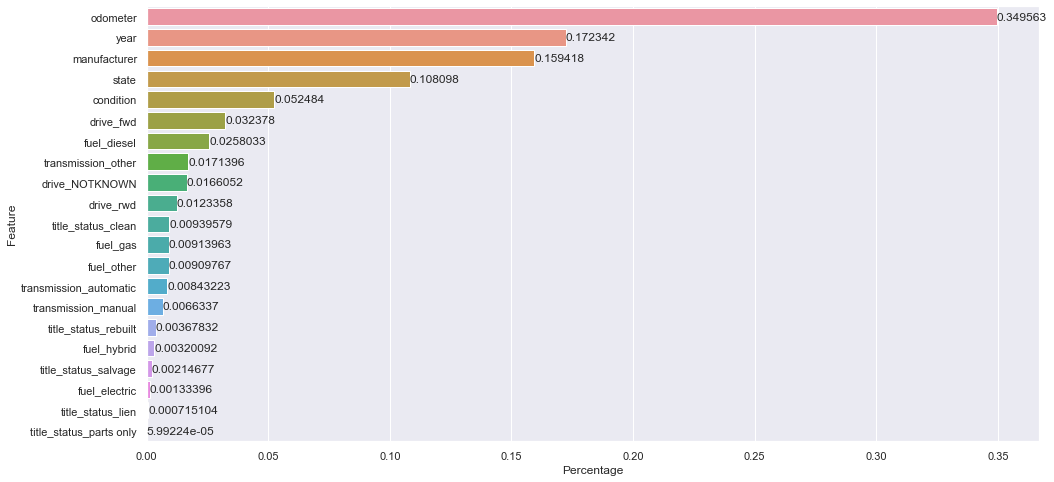

In [18]:
# ---- Feature importance ----
# Extract the weightage of importance for each data
feature = pd.DataFrame({'Feature' :train_tree.drop(columns=['price','PRICECATEGORY']).columns,\
                    'Percentage' : treeClassifier.feature_importances_ })
feature = feature.sort_values('Percentage',ascending=False).reset_index(drop = True)

# Plot the barchart of the features for visualisation
plt.figure(figsize=(16,8))
ax = sb.barplot(x = feature.Percentage, y = feature.Feature,\
                label = 'Total', edgecolor = 'w')
for container in ax.containers:
    ax.bar_label(container)


# End of Machine learning model exploration

This marks the end of this notebook.

We have done

- Testing of dataset with regressor models
    - linear regression
    - tree regressor

- Testing of dataset with a classifier model
    - tree classifier

- Testing price as a numeric response and categorical response

Learning points

- Linear regression may not be the best model to use since it predicts negative price values. Other models will prove to be better rather than trying to force fit a regression model to solve the problem

- We have seen that using price as categorical response yielded higher explained variance for the regessor models. This indicates lower residual sum of square, implying better model fit.

- Classification models are more suited to predicting a category, we feel that use of a classification model such as tree classifier will be more justified

- F1 score of classification model still far from ideal, we should consider a more complex model that could give us a higher F1 score

And we have found that while using a classfier is more appropriate for price as a caterogical data. However a 56% accuracy on the test dataset is too low, almost as good as a guess. We will explore a better model in the next notebook.